# Medical Appointment No Shows

## Project
This project aims to analyze 110,527 medical appointment records from a Brazilian healthcare facility to uncover behavioral and demographic factors associated with patient no-shows. Using these insights, the project develops a predictive model to estimate the likelihood of a patient missing an appointment. The model is designed to help the facility proactively identify at-risk patients and implement targeted interventions to reduce no-show rates and improve care delivery.

## Reference
- MLJourney, xgboost feature importance comprehensive guide

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Kaggle Dataset Medical Appointment NoShow
https://www.kaggle.com/datasets/joniarroba/noshowappointments/data

In [ ]:
# Read csv file
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [ ]:
# Display first 5 rows of dataframe
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# Convert data type from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

In [ ]:
# Do Patients have mulitple appointments in the dataset?
df['PatientId'].duplicated().sum()

np.int64(48228)

In [ ]:
# Any duplicated rows?
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for null values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [ ]:
# Is ScheduledDay less than AppointmentDay?
print("Number of rows where ScheduledDay LT AppointmentDay: ", len(df[df['ScheduledDay'] < df['AppointmentDay']]))

Number of rows where ScheduledDay LT AppointmentDay:  71959


In [ ]:
# Is ScheduledDay greater than AppointmentDay?
print("Number of rows where ScheduledDay GT AppointmentDay: ", len(df[df['ScheduledDay'] > df['AppointmentDay']]))

Number of rows where ScheduledDay GT AppointmentDay:  38568


In [ ]:
# ScheduledDay Greater Than AppointmentDay
# Treat as same day appointments.
# Set ScheduledDay = AppointmentDay
df.loc[df['ScheduledDay'] > df['AppointmentDay'], 'ScheduledDay'] = df['AppointmentDay']

In [ ]:
# Number of rows where ScheduledDay GT AppointmentDay post re-assignment
print("Number of rows where ScheduledDay GT AppointmentDay: ", len(df[df['ScheduledDay'] > df['AppointmentDay']]))

Number of rows where ScheduledDay GT AppointmentDay:  0


In [ ]:
# Number of rows where ScheduledDay EQ AppointmentDay post re-assignment
print("Number of rows where ScheduledDay = AppointmentDay: ", len(df[df['ScheduledDay'] == df['AppointmentDay']]))

Number of rows where ScheduledDay = AppointmentDay:  38568


In [ ]:
# Number of rows where ScheduledDay LT AppointmentDay post re-assignment
print("Number of rows where ScheduledDay LT AppointmentDay: ", len(df[df['ScheduledDay'] < df['AppointmentDay']]))

Number of rows where ScheduledDay LT AppointmentDay:  71959


In [ ]:
# columns info post data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [ ]:
# Top 10 Neighbourhood by Count
df.groupby('Neighbourhood').count()['PatientId'].sort_values(ascending=False).head(10)

,PatientId
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
CENTRO,3334
TABUAZEIRO,3132
SANTA MARTHA,3131
JESUS DE NAZARETH,2853


In [ ]:
# Number of unique values in Neighbourhood column
df['Neighbourhood'].nunique()

81

In [ ]:
# Handcap = number of disabilities a person has, i.e. blind, can't walk, etc.
df['Handcap'].value_counts()

,count
Handcap,
0,108286
1,2042
2,183
3,13
4,3


In [ ]:
# Age. Basic Statistics
df['Age'].describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [ ]:
#  Patients over 100
df[df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03 00:00:00+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 00:00:00+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [ ]:
# Patients Age = 0.  Assumed to be infants
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 00:00:00+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 00:00:00+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [ ]:
# Patient Age = -1.  Data error.
df[df['Age'] == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
# Remove row where Age == -1
df.drop(99832, inplace=True)

In [ ]:
# Confirm row removed
df['Age'].describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


## No-show Patients

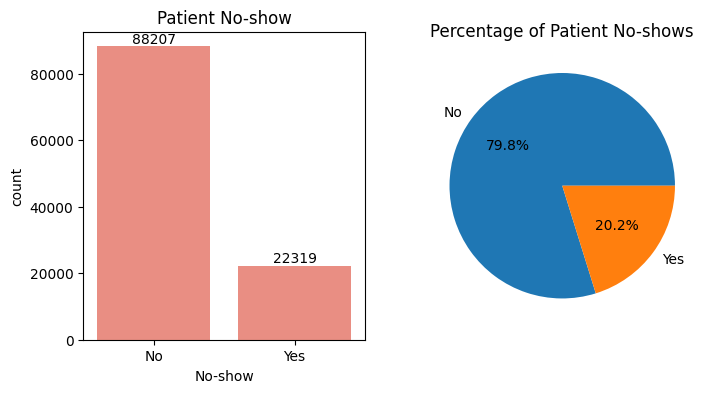

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.countplot(df, x='No-show',order=df['No-show'].value_counts().index, color="salmon")
ax.bar_label(ax.containers[0])
plt.title("Patient No-show")

plt.subplot(1,2,2)
count_ex = df['No-show'].value_counts()
plt.pie(count_ex.values, labels=count_ex.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Percentage of Patient No-shows")
plt.show()

## Feature Engineering

In [ ]:
df_fe = df.copy(deep=True)

In [ ]:
# Break AppointmentDay into month, day of week, and hour
df_fe['AppointmentDay_month'] = df_fe['AppointmentDay'].dt.month.astype('category')
df_fe['AppointmentDay_dow']   = df_fe['AppointmentDay'].dt.dayofweek.astype('category')
df_fe['AppointmentDay_hour']  = df_fe['AppointmentDay'].dt.hour.astype('category')

In [ ]:
# Days Between date Scheduled and Appointment
df_fe['DaysBetween'] = (df_fe['AppointmentDay'] - df_fe['ScheduledDay']).dt.days

In [ ]:
# Convert to pandas categorical
df_fe['Neighbourhood'] = df_fe['Neighbourhood'].astype('category')
df_fe['Gender'] = df_fe['Gender'].astype('category')

In [ ]:
# Rename No-show to remove dash
df_fe.rename(columns={'No-show':'NoShow'}, inplace=True)


In [ ]:
# NoShow. Replace No and Yes with 0 and 1 respectively
df_fe['NoShow'].replace({'No': 0, 'Yes':1}, inplace=True)

In [ ]:
# Change Handcap to binary (0 or 1). Change Handicap values 2,3,4 to 1.
df_fe['Handcap'].replace({2:1, 3:1, 4:1}, inplace=True)

In [ ]:
# Drop columns
df_fe = df_fe.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

In [ ]:
df_fe['DaysBetween'].describe()

,DaysBetween
count,110526.000000
mean,9.532825
std,15.027769
min,0.000000
25%,0.000000
50%,3.000000
75%,14.000000
max,178.000000


In [ ]:
df_fe['AppointmentDay_month'].value_counts()

,count
AppointmentDay_month,
5,80841
6,26450
4,3235


In [ ]:
df_fe['AppointmentDay_dow'].value_counts()

,count
AppointmentDay_dow,
2,25867
1,25640
0,22714
4,19019
3,17247
5,39


In [ ]:
df_fe['AppointmentDay_hour'].value_counts()

,count
AppointmentDay_hour,
0,110526


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                110526 non-null  category
 1   Age                   110526 non-null  int64   
 2   Neighbourhood         110526 non-null  category
 3   Scholarship           110526 non-null  int64   
 4   Hipertension          110526 non-null  int64   
 5   Diabetes              110526 non-null  int64   
 6   Alcoholism            110526 non-null  int64   
 7   Handcap               110526 non-null  int64   
 8   SMS_received          110526 non-null  int64   
 9   NoShow                110526 non-null  int64   
 10  AppointmentDay_month  110526 non-null  category
 11  AppointmentDay_dow    110526 non-null  category
 12  AppointmentDay_hour   110526 non-null  category
 13  DaysBetween           110526 non-null  int64   
dtypes: category(5), int64(9)
memory usage: 9.

In [ ]:
df_fe.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,AppointmentDay_month,AppointmentDay_dow,AppointmentDay_hour,DaysBetween
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,0,0


## NoShow Patient Data Visualization

In [ ]:
df_noshow = df_fe[df_fe['NoShow'] == 1].copy(deep=True)
df_noshow.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,AppointmentDay_month,AppointmentDay_dow,AppointmentDay_hour,DaysBetween
6,F,23,GOIABEIRAS,0,0,0,0,0,0,1,4,4,0,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,1,4,4,0,1
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,1,4,4,0,2
17,F,40,CONQUISTA,1,0,0,0,0,0,1,4,4,0,0
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,1,4,4,0,1


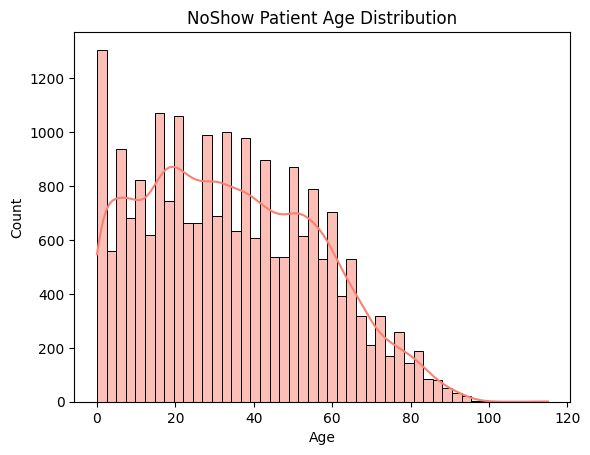

In [ ]:
sns.histplot(df_noshow, x='Age', kde=True, color='salmon')
plt.title("NoShow Patient Age Distribution")
plt.show()

Infant appointments have the highest number of missed appointments.  The next age group for missed appointments is young adults (18 to 26) followed by patients in their 30's.

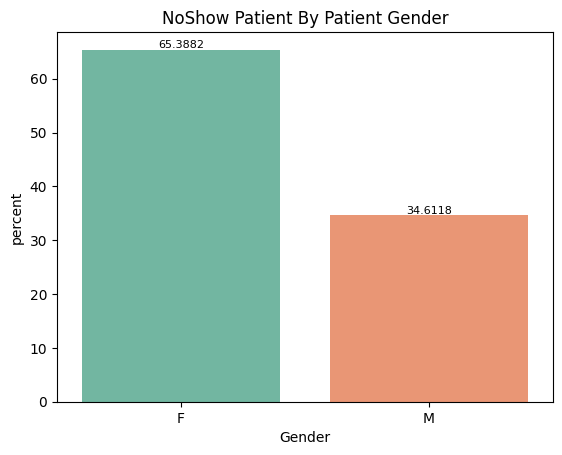

In [ ]:
ax=sns.countplot(df_noshow, x='Gender', palette="Set2", stat="percent")
for label in ax.containers:
    ax.bar_label(label, fontsize=8)
plt.title("NoShow Patient By Patient Gender")
plt.show()

Women are twice as likely to miss an appointment than men. 65% of noshows are female patients.

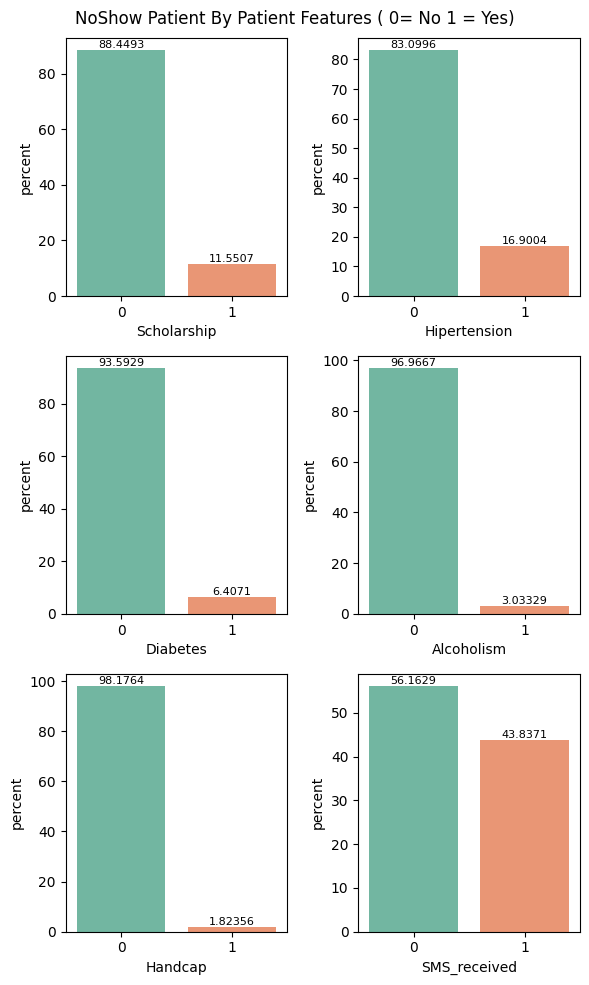

In [ ]:
fig, ax =plt.subplots(3,2, figsize=(6, 10))
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n+1 )
    sns.countplot(x=df_noshow[col], palette="Set2", stat="percent",ax = ax)
    # Add data labels
    for label in ax.containers:
        ax.bar_label(label, fontsize=8)
fig.suptitle("NoShow Patient By Patient Features ( 0= No 1 = Yes)")
fig.tight_layout()
plt.show()

Despite 43% of noshows receiving text message reminder, the appointment was still missed. Medical conditions impact on missed appointments is tiny.

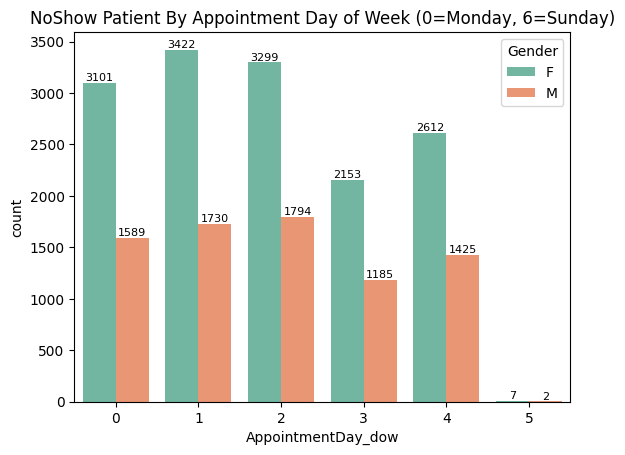

In [ ]:
ax=sns.countplot(df_noshow, x='AppointmentDay_dow', hue='Gender',palette="Set2")
for label in ax.containers:
    ax.bar_label(label, fontsize=8)
plt.title("NoShow Patient By Appointment Day of Week (0=Monday, 6=Sunday)")
plt.show()

Tuesday leads in the number of missed appointments with Monday and Wednesday close behind.

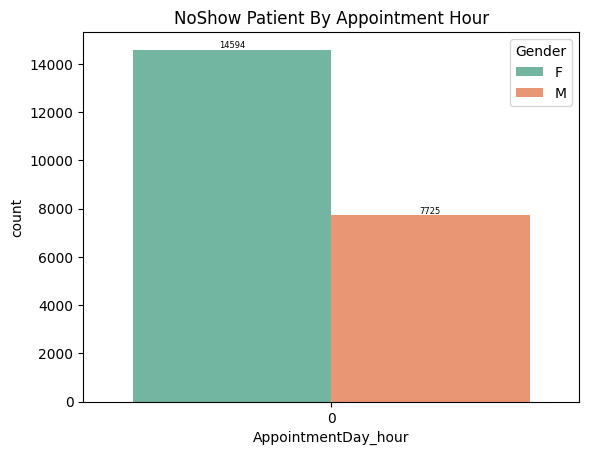

In [ ]:
ax=sns.countplot(df_noshow, x='AppointmentDay_hour', hue='Gender', palette="Set2")
for label in ax.containers:
    ax.bar_label(label, fontsize=6)
plt.title("NoShow Patient By Appointment Hour")
plt.show()

AppointmentDay time does not have hour information.  ScheduledDay time does have hour information.

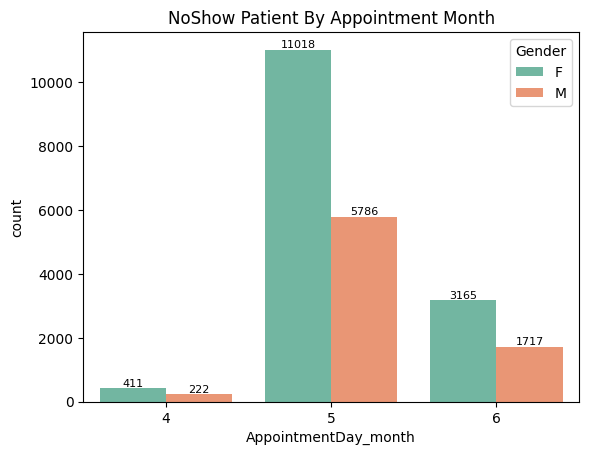

In [ ]:
ax=sns.countplot(df_noshow, x='AppointmentDay_month', hue='Gender', palette="Set2")
plt.title("NoShow Patient By Appointment Month")
for label in ax.containers:
    ax.bar_label(label, fontsize=8)
plt.show()

May has a very high rate of missed appointments.

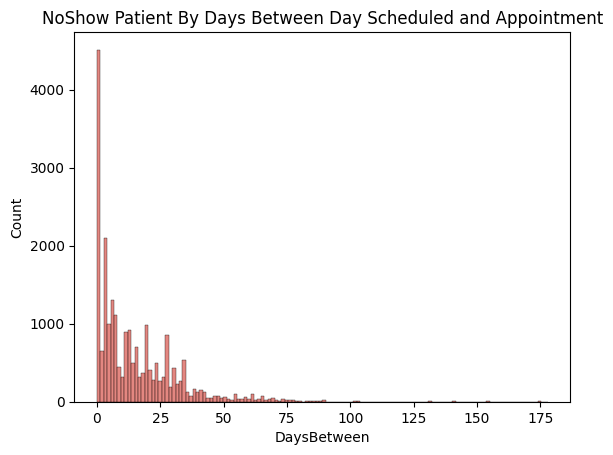

In [ ]:
sns.histplot(df_noshow, x='DaysBetween',palette="Set2")
plt.title("NoShow Patient By Days Between Day Scheduled and Appointment")
# for label in ax.containers:
#     ax.bar_label(label, fontsize=8)
plt.show()

It seems if the appointment is close to the date it was scheduled, it increases the chances that the appointment will be missed. Approximately 20% of missed appointments are same day appointments.

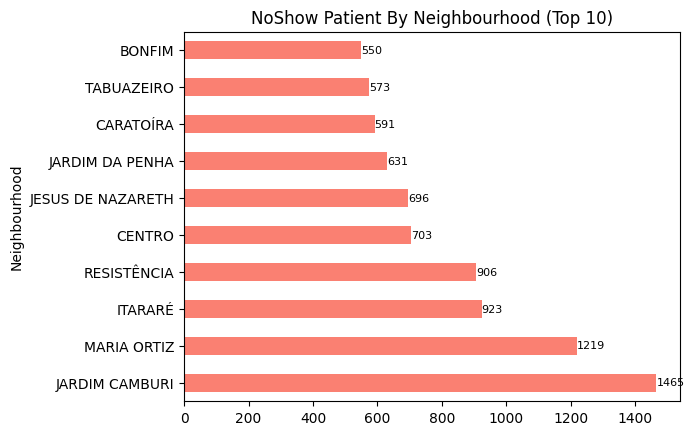

In [ ]:
# Top 10 Neighbourhood by Count
ax=df_noshow.groupby('Neighbourhood').count()['NoShow'].sort_values(ascending=False).head(10)\
.plot(kind="barh", color="salmon", title="NoShow Patient By Neighbourhood (Top 10)")
for label in ax.containers:
    ax.bar_label(label, fontsize=8)
#fig.tight_layout()
plt.show()

The Jardim Camburi neighborhood has the highest number of missed appointments.  The Itarrare neighborhood missed appointments are 26%  of total appointments in the neighborhood.

## NoShow Patient Insights
- 20% of scheduled appointments are missed.
- Female patients account for 65% of noshows.  
- Looking at age, infants have the highest amount of noshows.  The next age groups with high numbers for noshows are young adults (18 to 26) and adults in the mid-30s.  
- Tuesday has the highest number of noshows follwed by Monday and Wednesday.  After Wednesday, there is a decrease in noshows for Thursday to Saturday.
- May has an unusally high number of missed appointments.
- Patient medical conditions do not increase missed appointments.
- Sending text messages does not decrease noshows.  43% of noshows received text messages.
- Patients living in the Jardim Camburi neighborhood had the highest number of missed appointments, 19% of its scheduled appointments. However, patients living in the Itarare neighborhood missed 26% of their scheduled appointments.

##  Features and Target

In [ ]:
# Identify Features (X) and Target (y)
X = df_fe.drop('NoShow', axis=1)
y = df_fe['NoShow'].astype('int')
X.shape, y.shape

((110526, 13), (110526,))

## Imbalance

In [ ]:
# Address Imbalance between Not NoShow (88207) and NoShow (22319)
# SMOTENC handles numerical and categorical features
from imblearn.over_sampling import SMOTENC

# Indicate which features are categorical
categorical_features = [0,2]

# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features = categorical_features, random_state=42)

# Perform the resampling
X_resampled, y_resampled = smote_nc.fit_resample(X,y)


In [ ]:
# Resampled Features and Target
X_resampled.shape, y_resampled.shape

((176414, 13), (176414,))

In [ ]:
# Resampled Target
y_resampled.value_counts()

,count
NoShow,
0,88207
1,88207


## Split into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## XgBoost Model

In [ ]:
import xgboost as xgb

# Train with native categorical support
xgb_model = xgb.XGBClassifier(enable_categorical=True,
    objective='binary:logistic',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=1.0,
    colsample_bytree=0.3,
    eval_metric='logloss'

)
# Fit Model
xgb_model.fit(X_resampled, y_resampled)

# Prediction
preds = xgb_model.predict(X_test)

## Model Results

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluation
accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 72.45699061871156


## Model Feature Importance

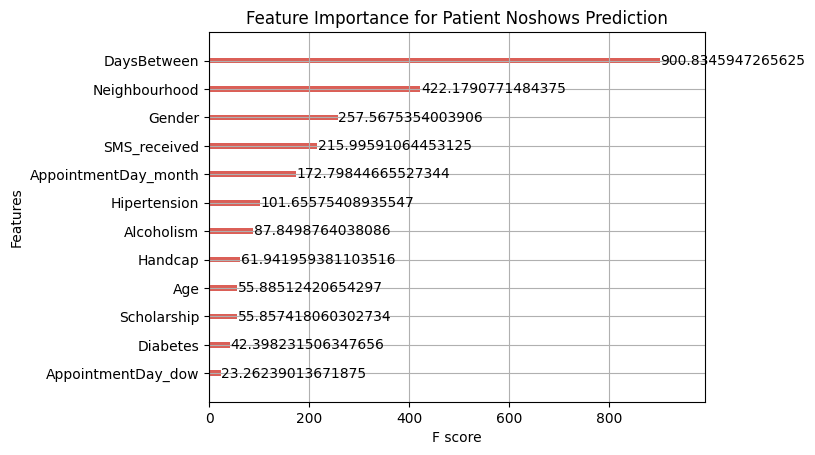

In [ ]:
from xgboost import plot_importance
# Plot gain-based feature importance
plot_importance(xgb_model, importance_type='gain')
plt.title("Feature Importance for Patient Noshows Prediction")
plt.show()

Gain-based feature importance measures the improvement in model accuracy or the reduction in error when a feature is used to split data within a tree. The features that contributed the most to the model's accuracy are DaysBetween, Neighbourhood, Gender, and SMS_received.  

## Limitations
- AppointmentDay column did not contain any time information.  This information would be useful to determine if appointment time impacts missed appointments.
- Several observations had ScheduledDay > AppointmentDay, which impacts the feature DaysBetween. DaysBetween is the top feature.


## Improving Model Performance
- Try different models
- Add new features
- Correct data issues

## Next Steps
- Build a user-friendly interface that would allow the enduser to input parameters and receive a prediction on whether the patient is likely to miss the appointmnet.
- Develop a strategy to engage the groups identified to provide assistance to help the patient keep the appointment.
- Engage in additional research on why patients are missing appointments, ie. transportation, distance, work, childcare, finances, weather, appointment auto-scheduled, etc.
- Are home visits an option for women with infants?
- Can the medical facility provide a pickup service for patients?